# Mapping DRC Data

Imports necessary Python libraries to generate nice-looking maps, as well as the shape file for the DRC containing the closest equivalent I could find to the provences that are contained in our dataset.

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize


%matplotlib inline
import seaborn
seaborn.set_style('ticks')
seaborn.set_color_codes()

In [3]:
m = Basemap(resolution='l', # c, l, i, h, f or None (crude, low, intermediate, high)
            projection='merc', #mercator
            lat_0=54.5, lon_0=-4.36, #Coordinates of lower-left and upper-right. http://boundingbox.klokantech.com/
            llcrnrlon=12., llcrnrlat= -14., urcrnrlon=33.49, urcrnrlat=5.35);

First, just draw the shape file and land/water.

(9,
 5,
 [12.206628799438477, -13.45567607879633, 0.0, 0.0],
 [31.305723190307567, 5.386097908020109, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x112008fd0>)

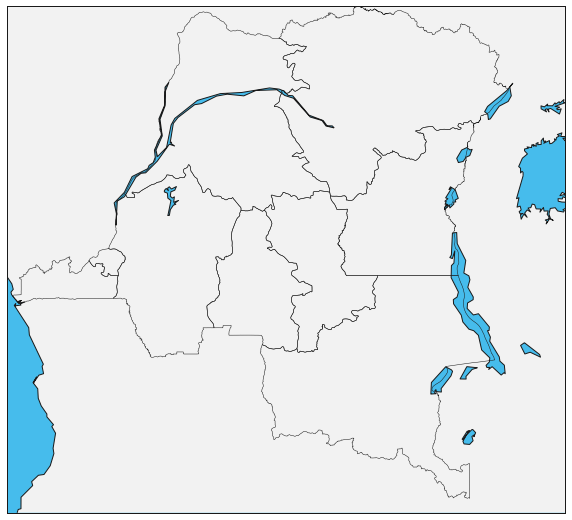

In [4]:
fig, ax = plt.subplots(figsize=(10,20)); 
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('COD_adm_shp/COD_adm1', 'areas')

Create a dataframe containing the polygon shapes and areas, so you can create a colormap with these polygons.

In [15]:
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'area': [area['NAME_1'] for area in m.areas_info]
    })

print df_poly

                area                                shapes
0           Équateur       Poly((845313, 2.14382e+06) ...)
1           Bandundu       Poly((807830, 1.43493e+06) ...)
2          Bas-Congo           Poly((50887.2, 901624) ...)
3          Bas-Congo           Poly((56477.8, 905227) ...)
4          Bas-Congo           Poly((54222.9, 906066) ...)
5          Bas-Congo           Poly((53234.7, 906997) ...)
6          Bas-Congo       Poly((267664, 1.09236e+06) ...)
7   Kasaï-Occidental  Poly((1.08368e+06, 1.29664e+06) ...)
8     Kasaï-Oriental  Poly((1.33826e+06, 1.37975e+06) ...)
9            Katanga  Poly((1.66594e+06, 1.01588e+06) ...)
10     Kinshasa City       Poly((440332, 1.12892e+06) ...)
11              Kivu  Poly((1.99218e+06, 1.67031e+06) ...)
12         Orientale  Poly((1.50725e+06, 2.17117e+06) ...)


Create a new datafram containing the name of each polygon, plus whatever data you want in the colormap. Here, it's a random number between 0 and 1 to represent some fake vaccination data.

In [20]:
slength = len(df_poly['area']) #Number of polygons

df_vdata = {'area': df_poly['area'],'vacc':pd.Series(np.abs(np.random.uniform(low=0.,high=1.,size=[slength])), index=df_poly.index)}
df_vdata = pd.DataFrame(df_vdata)
print df_vdata

                area      vacc
0           Équateur  0.231957
1           Bandundu  0.221424
2          Bas-Congo  0.354025
3          Bas-Congo  0.242325
4          Bas-Congo  0.878743
5          Bas-Congo  0.013059
6          Bas-Congo  0.163680
7          Bas-Congo  0.427753
8          Bas-Congo  0.262478
9          Bas-Congo  0.164455
10         Bas-Congo  0.799450
11         Bas-Congo  0.616665
12         Bas-Congo  0.295253
13         Bas-Congo  0.467326
14         Bas-Congo  0.471386
15         Bas-Congo  0.788482
16         Bas-Congo  0.659694
17         Bas-Congo  0.155042
18         Bas-Congo  0.710985
19         Bas-Congo  0.220108
20         Bas-Congo  0.852534
21         Bas-Congo  0.446202
22         Bas-Congo  0.052429
23         Bas-Congo  0.522203
24         Bas-Congo  0.458448
25         Bas-Congo  0.728778
26         Bas-Congo  0.136559
27  Kasaï-Occidental  0.633106
28    Kasaï-Oriental  0.260619
29           Katanga  0.294427
30     Kinshasa City  0.559655
31      

Merge the two dataframes so that vaccination data is now a column in df_poly

In [23]:
df_poly = df_poly.merge(df_vdata,on='area',how='left')
df_map = df_poly.drop_duplicates() #Gotta drop the duplicates.
print df_map


                   area                                shapes    vacc_x  \
0              Équateur       Poly((845313, 2.14382e+06) ...)  0.556153   
1              Bandundu       Poly((807830, 1.43493e+06) ...)  0.304268   
2             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
3             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
4             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
5             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
6             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
7             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
8             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
9             Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
10            Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
11            Bas-Congo           Poly((50887.2, 901624) ...)  0.600946   
12            Bas-Congo  

Set some stuff up for the mapping - color mpa, column to set facecolor, etc.

In [27]:

cmap = plt.get_cmap('viridis')   #Correct choice for color map.
pc = PatchCollection(df_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_map['vacc'].fillna(0).values)))
ax.add_collection(pc)


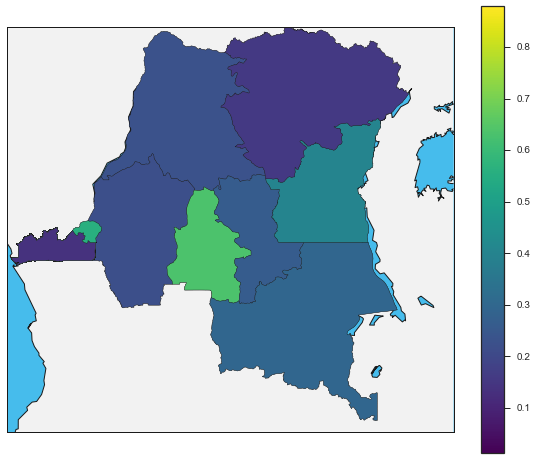

In [28]:

fig, ax = plt.subplots(figsize=(10,20));
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('COD_adm_shp/COD_adm1', 'areas')

cmap = plt.get_cmap('viridis')   
pc = PatchCollection(df_map.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_map['vacc'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_map['vacc'])
plt.colorbar(mapper, shrink=0.4)

m
 